# Introduction

In a high-volume manufacturing plant, being able to identify errors and predict the status of the output while it is still in the manufacturing processes is highly valuable to the company. As this translates to waste reduction, cost saving and ability to carry out preventive and corrective action swiftly.

We will be working on the continuous factory processes data from Kaggle and trying to predict the output at the end of the stage one for each measurement point. Without the relevant data to determine whether the output is passed or failed, we do not know the effect of deviation from setpoints have on the output. So, in this notebook we will focus on prediction of actual measurement, and this will come in handy should we have pass or fail data in the future.

First, we will predict all the measurements together as a single dataset and calculate the r2 score. Secondly, we will clean each measurement and separate them into individual set to see whether their r2 scores improve.


With that in mind, I would like to demonstrate my ability:
- to clean and wrangle data
- to use data analytics and visualization to explore the content and distribution of the data
- to use machine learning (Linear Regression and Random Forest Regression) to predict an output from the given sample data
- to tuning data to improve the result of initial prediction

# Data Exploration and Wrangling

The attributes (Xs) here include all the environmental and raw material variables whereas the target (Y) is the actual measurement of the output. Both attributes and target are continuous data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("continuous_factory_process.csv")

# We will only look at processes in stage1 
df = df.iloc[:,1:72]
df

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement10.U.Setpoint,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement11.U.Setpoint,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement12.U.Setpoint,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement13.U.Setpoint,Stage1.Output.Measurement14.U.Actual,Stage1.Output.Measurement14.U.Setpoint
0,17.24,23.53,11.54,200,963.00,247,1241.26,72.0,72.3,48.03,...,8.06,8.65,5.54,6.16,1.66,2.02,2.69,3.16,14.51,17.72
1,17.24,23.53,11.54,200,963.00,247,1246.09,72.0,72.3,48.03,...,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00,17.72
2,17.24,23.53,11.54,200,963.00,247,1246.29,72.0,72.3,48.16,...,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00,17.72
3,17.24,23.53,11.54,200,963.00,247,1247.59,72.0,72.3,48.57,...,7.55,8.65,5.13,6.16,1.04,2.02,2.70,3.16,0.00,17.72
4,17.24,23.53,11.54,200,963.00,247,1252.83,72.1,72.4,48.57,...,7.54,8.65,5.15,6.16,1.15,2.02,2.72,3.16,0.00,17.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14083,13.84,24.43,12.22,201,1048.06,252,1263.76,72.0,71.8,73.46,...,7.60,8.65,0.00,6.16,1.42,2.02,3.41,3.16,0.00,17.72
14084,13.84,24.43,12.22,201,1048.06,252,1255.42,72.0,71.8,73.32,...,7.60,8.65,0.00,6.16,1.42,2.02,3.41,3.16,0.00,17.72
14085,13.84,24.43,12.22,201,1048.06,252,1257.52,72.0,71.8,73.59,...,7.60,8.65,0.00,6.16,1.42,2.02,3.41,3.16,0.00,17.72
14086,13.84,24.43,12.22,201,1048.06,252,1261.99,72.0,71.9,74.40,...,7.66,8.65,0.00,6.16,1.40,2.02,3.30,3.16,0.00,17.72


In [3]:
df.describe()

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement10.U.Setpoint,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement11.U.Setpoint,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement12.U.Setpoint,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement13.U.Setpoint,Stage1.Output.Measurement14.U.Actual,Stage1.Output.Measurement14.U.Setpoint
count,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,...,14088.000000,14088.000000,1.408800e+04,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000
mean,15.330759,23.843635,11.851256,205.676320,951.679815,248.868896,1242.764276,72.013330,72.013106,70.333111,...,7.681824,8.615616,1.492745e+00,6.135514,1.202880,2.011970,2.881181,3.147439,9.940519,17.649563
std,1.188993,0.373535,0.510309,11.606324,126.662010,3.297820,95.845946,0.063183,0.406313,5.525217,...,1.085486,0.544297,2.542739e+00,0.387615,0.663677,0.127108,0.941027,0.198841,7.416543,1.115022
min,13.840000,23.020000,11.540000,200.000000,601.110000,247.000000,231.300000,71.900000,71.300000,44.400000,...,-0.001439,0.000000,-1.633650e-20,0.000000,-0.000356,0.000000,-1.225095,0.000000,-6.548924,0.000000
25%,14.040000,23.530000,11.540000,200.000000,963.000000,247.000000,1257.170000,72.000000,71.600000,68.880000,...,7.730000,8.650000,0.000000e+00,6.160000,1.390000,2.020000,3.020000,3.160000,0.000000,17.720000
50%,15.120000,23.930000,11.540000,200.000000,963.000000,247.000000,1264.440000,72.000000,72.000000,71.980000,...,7.840000,8.650000,0.000000e+00,6.160000,1.500000,2.020000,3.180000,3.160000,15.030000,17.720000
75%,16.630000,24.160000,12.220000,201.000000,1027.430000,251.000000,1273.460000,72.000000,72.400000,72.920000,...,7.920000,8.650000,5.410000e+00,6.160000,1.570000,2.020000,3.320000,3.160000,15.760000,17.720000
max,17.240000,24.430000,12.900000,236.000000,1048.060000,257.000000,1331.820000,72.500000,72.700000,88.530000,...,13.070000,8.650000,7.470000e+00,6.160000,3.950000,2.020000,6.910000,3.160000,22.301788,17.720000


In [24]:
# Visualization of dataset
def stage1_plot(df):
    plt.figure(figsize=(8,8))
    for i in range (15):
        plt.scatter([i]*len(df[("Stage1.Output.Measurement"+str(i)+".U.Actual")]),df[("Stage1.Output.Measurement"+str(i)+".U.Actual")],c="y")
        plt.scatter([i]*len(df[("Stage1.Output.Measurement"+str(i)+".U.Actual")]),df[("Stage1.Output.Measurement"+str(i)+".U.Setpoint")],c="black",s=10)
    plt.text(4.4, 32.5, s="Setpoint",c="white",bbox=dict(facecolor="black"))
    plt.text(4.4, 29, s="Data Point",bbox=dict(facecolor="y",alpha=0.5))
    plt.xlabel("Measure Point")
    plt.ylabel("Measurement")
    plt.xticks(range(0,15))
    plt.title("Distribution of Actual and Setpoint values for each Measure Point")

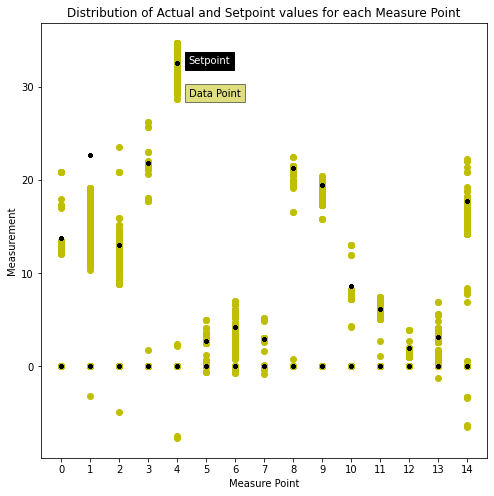

In [25]:
stage1_plot(df)

From scatter graph, we can observed that for each measurement there are two different setpoint (blackdot) values. We can also see that some of the actual measurements have minimum value of negative/zero.
We can either 
1. drop zeros and negatives from dataset 
2. drop negatives and replace zeros with mean or median value

## Dropping data with zero and negative values

In [6]:
df_full = df[(df!=0).all(axis=1)]
df_full

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement10.U.Setpoint,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement11.U.Setpoint,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement12.U.Setpoint,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement13.U.Setpoint,Stage1.Output.Measurement14.U.Actual,Stage1.Output.Measurement14.U.Setpoint
20,17.24,23.53,11.54,200,963.00,247,1241.780852,72.100109,72.550000,49.684379,...,8.074154,8.65,5.395436e+00,6.16,1.630459e+00,2.02,2.709507e+00,3.16,1.572458e+01,17.72
34,17.24,23.53,11.54,200,963.00,247,1245.381787,72.200000,72.625782,49.383039,...,7.959058,8.65,5.389324e+00,6.16,1.635039e+00,2.02,2.670606e+00,3.16,1.426794e+01,17.72
35,17.24,23.53,11.54,200,963.00,247,1241.587658,72.200000,72.674218,49.108716,...,7.968160,8.65,5.395756e+00,6.16,1.604886e+00,2.02,2.669794e+00,3.16,1.501920e+01,17.72
598,17.04,23.69,11.54,200,963.00,247,1266.860000,72.100000,72.500000,77.760000,...,4.219223,8.65,5.626943e+00,6.16,5.006890e-34,2.02,-1.734750e-08,3.16,1.448542e+01,17.72
1539,16.73,24.00,11.54,200,963.00,247,1256.271475,72.000000,71.678255,75.218619,...,7.981952,8.65,5.830977e+00,6.16,1.923841e+00,2.02,3.163210e+00,3.16,1.463691e+01,17.72
1679,16.73,24.09,11.54,200,963.00,247,1273.880316,72.000000,72.550001,75.086588,...,8.082843,8.65,5.906473e+00,6.16,-4.309260e-24,2.02,8.315206e-01,3.16,1.490012e+01,17.72
4208,16.64,24.02,11.54,200,963.00,247,1280.891366,72.000000,72.499965,71.153482,...,7.570112,8.65,-1.633650e-20,6.16,-9.295400e-101,2.02,1.454414e-01,3.16,-9.503900e-100,17.72
4213,16.64,24.02,11.54,200,963.00,247,1254.803888,72.000000,72.378380,71.682330,...,7.593958,8.65,-1.262480e-23,6.16,-1.202820e-97,2.02,1.360415e-01,3.16,-1.187600e-96,17.72
4460,16.63,23.77,11.54,200,963.00,247,1166.367312,72.000000,71.399981,72.549907,...,7.764630,8.65,7.496200e-49,6.16,1.618895e+00,2.02,3.035000e+00,3.16,1.578889e+01,17.72
5131,16.44,23.70,11.54,200,963.00,247,1258.610166,72.000000,72.095673,72.334187,...,7.819430,8.65,-1.301500e-245,6.16,1.582310e+00,2.02,3.031179e+00,3.16,1.575181e+01,17.72


We have only 15 rows of data after dropping the zero and negative values. So, we have to explore the other option by substitute zero with mean and median value and dropped negative values.

## Dropping data with negative values and replace zero with mean/median

In [7]:
# Find out the number of zeros in each setpoint
df_positive = df[(df[df.columns[1:]]>=0).all(axis=1)]
(df_positive==0).sum(axis=0)[41:71]

Stage1.Output.Measurement0.U.Actual          70
Stage1.Output.Measurement0.U.Setpoint        56
Stage1.Output.Measurement1.U.Actual        5896
Stage1.Output.Measurement1.U.Setpoint        56
Stage1.Output.Measurement2.U.Actual          85
Stage1.Output.Measurement2.U.Setpoint        56
Stage1.Output.Measurement3.U.Actual         135
Stage1.Output.Measurement3.U.Setpoint        56
Stage1.Output.Measurement4.U.Actual         174
Stage1.Output.Measurement4.U.Setpoint        56
Stage1.Output.Measurement5.U.Actual       13395
Stage1.Output.Measurement5.U.Setpoint        56
Stage1.Output.Measurement6.U.Actual        4703
Stage1.Output.Measurement6.U.Setpoint        56
Stage1.Output.Measurement7.U.Actual        8741
Stage1.Output.Measurement7.U.Setpoint        56
Stage1.Output.Measurement8.U.Actual         777
Stage1.Output.Measurement8.U.Setpoint        56
Stage1.Output.Measurement9.U.Actual         722
Stage1.Output.Measurement9.U.Setpoint        56
Stage1.Output.Measurement10.U.Actual    

Now we know how many missing values there are for each measurement. The number of zeros for every setpoint is 56. There is a high chance that there are all from the same row. We will drop the rows that contain zero in measurement 0 setpoint.

In [8]:
df_0 = df_positive[df_positive["Stage1.Output.Measurement0.U.Setpoint"] != 0]
(df_0==0).sum(axis=0)[41:71]

Stage1.Output.Measurement0.U.Actual          14
Stage1.Output.Measurement0.U.Setpoint         0
Stage1.Output.Measurement1.U.Actual        5840
Stage1.Output.Measurement1.U.Setpoint         0
Stage1.Output.Measurement2.U.Actual          29
Stage1.Output.Measurement2.U.Setpoint         0
Stage1.Output.Measurement3.U.Actual          79
Stage1.Output.Measurement3.U.Setpoint         0
Stage1.Output.Measurement4.U.Actual         118
Stage1.Output.Measurement4.U.Setpoint         0
Stage1.Output.Measurement5.U.Actual       13339
Stage1.Output.Measurement5.U.Setpoint         0
Stage1.Output.Measurement6.U.Actual        4647
Stage1.Output.Measurement6.U.Setpoint         0
Stage1.Output.Measurement7.U.Actual        8685
Stage1.Output.Measurement7.U.Setpoint         0
Stage1.Output.Measurement8.U.Actual         721
Stage1.Output.Measurement8.U.Setpoint         0
Stage1.Output.Measurement9.U.Actual         666
Stage1.Output.Measurement9.U.Setpoint         0
Stage1.Output.Measurement10.U.Actual    

In [9]:
#replace the zero with mean and median value
df_mean = df_0.replace(0,df_0.mean())
df_median = df_0.replace(0,df_0.median())

In [10]:
# To find out individual difference and average difference
def measurement_diff(df):
    diffs = []
    for i in range (15):
        diff = np.mean(df[("Stage1.Output.Measurement"+str(i)+".U.Setpoint")]-df[("Stage1.Output.Measurement"+str(i)+".U.Actual")])
        diffs.append(diff)
    print(['%.3f' % diff for diff in diffs])
    return np.mean(diffs)

In [11]:
measurement_diff(df_mean)

['0.789', '11.286', '1.593', '0.347', '-0.746', '2.497', '2.460', '1.178', '0.442', '0.621', '0.820', '3.547', '0.542', '0.208', '4.208']


1.986033597340232

In [12]:
# Yield lower average difference compare to df_mean
measurement_diff(df_median)

['0.789', '9.126', '1.593', '0.346', '-0.749', '2.615', '2.362', '1.864', '0.387', '0.577', '0.818', '4.660', '0.477', '0.202', '2.423']


1.8326606243197843

## Prediction using Linear Regression and Random Forest Regression

The data set is looped within the define function (R2score) with a test and train split ratio of 1:3 to predict the actual measurement for each point. The respective R2 score is calculated to evaluate the performance. There are two parts of data prediction one with tuning and another without.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [14]:
# Data Preparation
def data (df):
    #columns of actual measurements
    actual_column = [41,43,45,47,49,51,53,55,57,59,61,63,65,67,69]
    actual_name = list(df.columns[actual_column])
    
    #columns of setpoints
    setpoint_column = [x+1 for x in actual_column]
    setpoint_name = list(df.columns[setpoint_column])

    actual_data = df.iloc[:,actual_column]
    setpoint_data = df.iloc[:,setpoint_column]
    dataset = df.drop(columns=actual_name)
    dataset = dataset.drop(columns=setpoint_name)

    dataset = dataset.iloc[:,1:]
    return dataset, actual_data

In [15]:
def R2score(modeltype,data):
    scores = []
    for i in range (15):
        actual = data["Stage1.Output.Measurement"+str(i)+".U.Actual"]
        x_train, x_test, y_train, y_test = train_test_split(dataset,actual,random_state=42)
        model = modeltype
        model.fit(x_train,y_train)
        y_predict = model.predict(x_test)
        score = r2_score(y_test, y_predict)
        scores.append(score)
        #print ("Measurement "+str(i)+": %.3f" %score)
    return scores

## Without Tuning 

In [17]:
dataset, mean_actual_data = data(df_mean)
_ , median_actual_data = data(df_median)

In [18]:
LR_mean_r2 = R2score(LinearRegression(),mean_actual_data)
LR_median_r2 = R2score(LinearRegression(),median_actual_data)

In [19]:
RF_mean_r2 = R2score(RandomForestRegressor(random_state=42),mean_actual_data)
RF_median_r2 = R2score(RandomForestRegressor(random_state=42),median_actual_data)

In [40]:
#To plot graph to compare two sets of data for LR and RF

def compareplot (xrange,Rdata1,Rdata2,Ldata3,Ldata4,title1,title2,label1,label2):
    fig = plt.figure(figsize=(20,10))
    ax1 = plt.subplot(121)
    plt.plot(xrange,Rdata1,'-o',markersize=10,label=label1)
    plt.plot(xrange,Rdata2,'--o',markersize=10,label=label2)
    plt.xticks(np.arange(0,15,1))
    plt.ylim = ([0,1])
    plt.xlabel("Measure Point")
    plt.ylabel("R2 Score")
    plt.title(title1)
    plt.legend(loc="lower right")

    ax2 = plt.subplot(122,sharey=ax1)
    plt.plot(xrange,Ldata3,'-o',markersize=10,label=label1)
    plt.plot(xrange,Ldata4,'--o',markersize=10,label=label2)
    plt.xticks(np.arange(0,15,1))
    plt.ylim = ax1
    plt.xlabel("Measure Point")
    plt.ylabel("R2 Score")
    plt.title(title2)
    plt.legend(loc="lower right")

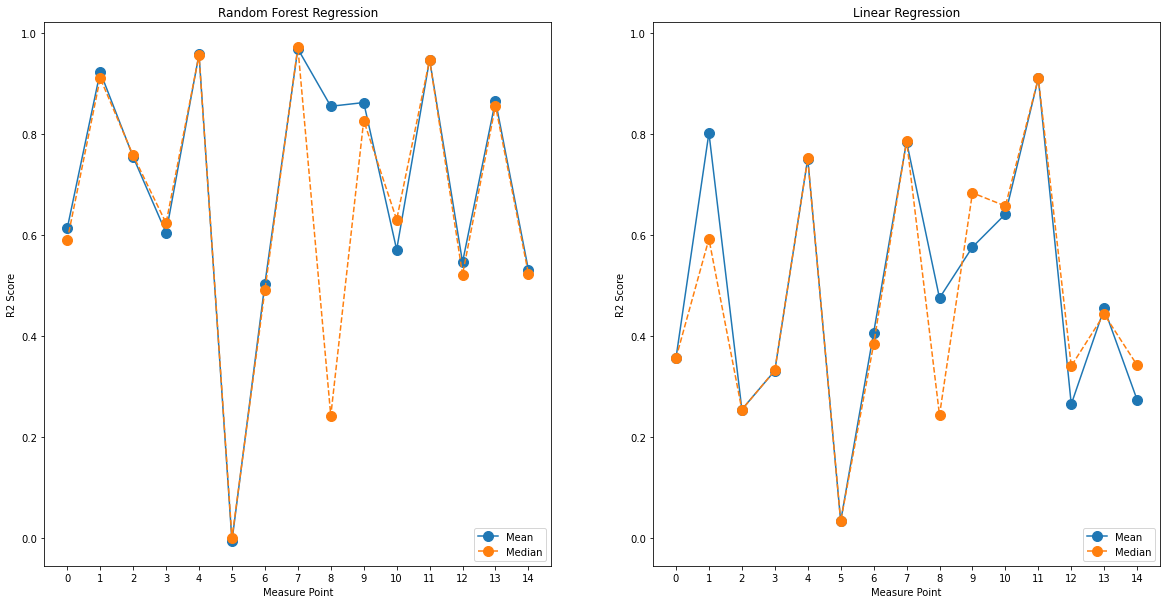

In [41]:
compareplot(range(0,15), RF_mean_r2,RF_median_r2, LR_mean_r2, LR_median_r2,"Random Forest Regression","Linear Regression","Mean","Median")

Overall random forest regression has better R2 score than linear regression. Within random forest regression, mean dataset performed better than the median. However, from the scatter plot above we can clearly see some of the distribution ranges are large so using median substituted dataset will be more applicable. 

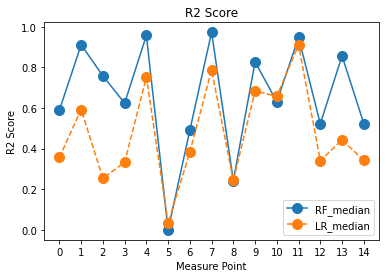

In [61]:
plt.plot(range(0,15),RF_median_r2,'-o',markersize=10,label="RF_median")
plt.plot(range(0,15),LR_median_r2,'--o',markersize=10,label="LR_median")
plt.xticks(np.arange(0,15,1))
plt.xlabel("Measure Point")
plt.ylabel("R2 Score")
plt.title("R2 Score")
plt.legend(loc="lower right")

When comparing the median substituted dataset, linear regression performed slightly better than random forest regression at measure point 5 and 10.

## Tuning (To rid of outliers)
Even after we substituted the zeros with median values, the measurements are still scattered to a wide range. A control process will not have such output. Those extreme values might be due to machine shut down/maintenance or writing error. So, we will filter (using mean dataset as it performed better than median) each measurement individually with 20% tolerance around its setpoint. It is important to note that the measurements for point 2 deviated so much from its setpoints.

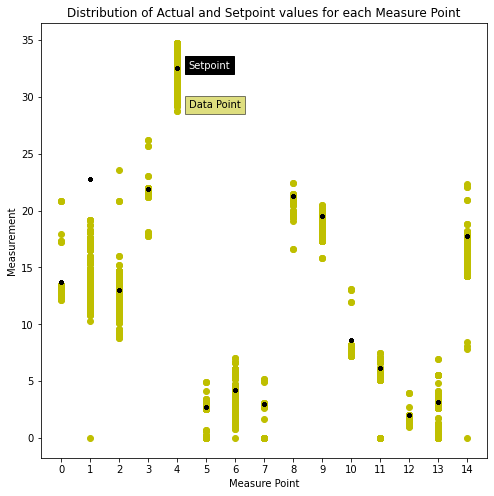

In [38]:
stage1_plot(df_median)

In [44]:
# Include only the 20% data around the setpoints
filter_set_median = {}
for i in range (15):
    y = 1.2*df_median["Stage1.Output.Measurement"+str(i)+".U.Setpoint"]
    x = 0.8*df_median["Stage1.Output.Measurement"+str(i)+".U.Setpoint"]
    filter_set_median[i]= df_median[(df_median["Stage1.Output.Measurement"+str(i)+".U.Actual"]<=y)&(df_median["Stage1.Output.Measurement"+str(i)+".U.Actual"]>=x)]

In [45]:
def individual (modeltype,filter_data):
    indi_scores = []
    for i in range (15):
        dataset, actual_data = data(filter_data[i])
        x_train, x_test, y_train, y_test = train_test_split(dataset,actual_data["Stage1.Output.Measurement"+str(i)+".U.Actual"],random_state=42)
        model = modeltype
        model.fit(x_train,y_train)
        y_predict = model.predict(x_test)
        score = r2_score(y_test, y_predict)
        indi_scores.append(score)

    return indi_scores

In [48]:
LRf_median_r2 = individual(LinearRegression(),filter_set_median)

In [49]:
RFf_median_r2 = individual(RandomForestRegressor(random_state=42),filter_set_median)

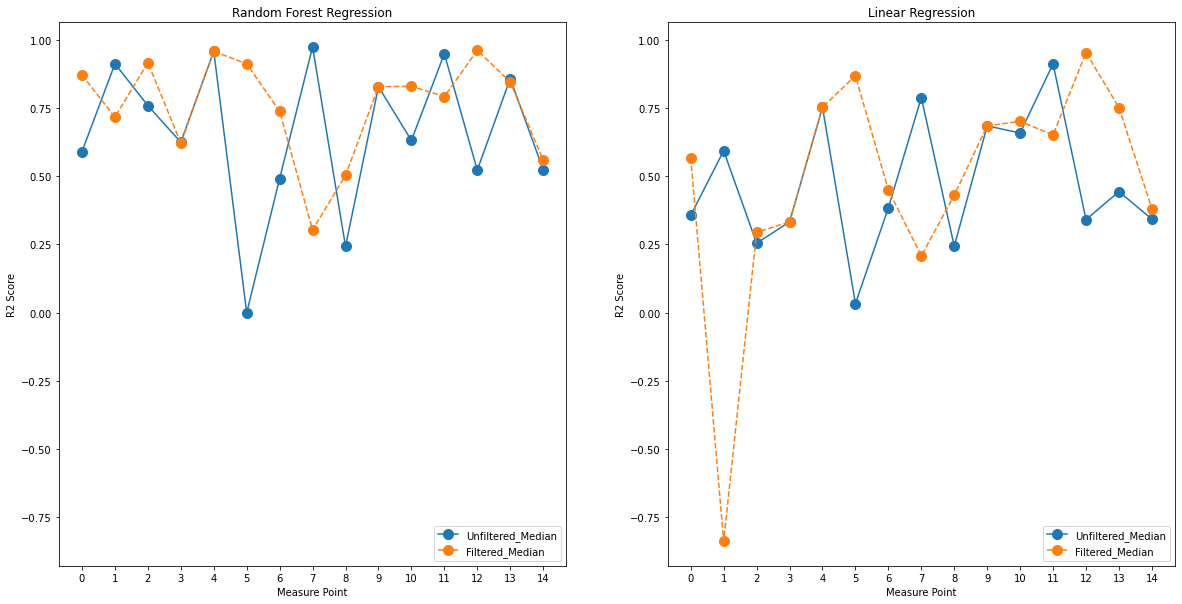

In [52]:
compareplot(range(0,15),RF_median_r2,RFf_median_r2, LR_median_r2, LRf_median_r2,"Random Forest Regression","Linear Regression","Unfiltered_Median","Filtered_Median")

The most significant drop of R2 score can be observed on linear regression measure point 2. That is because after filtering the dataset, we only left with 19 available data for analysis.

In [55]:
for i in range (15):
    print ("Values available for Measure Point "+str(i)+":",len(filter_set_median[i]))

Values available for Measure Point 0: 13987
Values available for Measure Point 1: 19
Values available for Measure Point 2: 13954
Values available for Measure Point 3: 13997
Values available for Measure Point 4: 13997
Values available for Measure Point 5: 632
Values available for Measure Point 6: 422
Values available for Measure Point 7: 5304
Values available for Measure Point 8: 13995
Values available for Measure Point 9: 13997
Values available for Measure Point 10: 13991
Values available for Measure Point 11: 3605
Values available for Measure Point 12: 2035
Values available for Measure Point 13: 12712
Values available for Measure Point 14: 13990


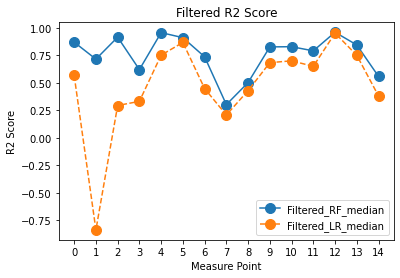

In [65]:
plt.plot(range(0,15),RFf_median_r2,'-o',markersize=10,label="Filtered_RF_median")
plt.plot(range(0,15),LRf_median_r2,'--o',markersize=10,label="Filtered_LR_median")
plt.xticks(np.arange(0,15,1))
plt.xlabel("Measure Point")
plt.ylabel("R2 Score")
plt.title("Filtered R2 Score")
plt.legend(loc="lower right")

Random forest regression with filtered median data still performed better than linear regression.

## Consideration of Zeros in Raw Data
In this section we will address the issue lay within the dataset – the amount of zero values in each measurement point. We will exclude those actual measurement with more than 3000 zeros because it caused overfitting to the model as we substituted the zeros with median value.

In [56]:
RF_del = RF_median_r2.copy()
RFf_del = RFf_median_r2.copy()
LR_del = LR_median_r2.copy()
LRf_del = LRf_median_r2.copy()

In [57]:
#Delete the measurements with more than 3000 zeros from main data and stored them in x,x1,y,y1
x = [RF_del.pop(i) for i in [14,12,11,7,6,5,1]]
x1 = [RFf_del.pop(i) for i in [14,12,11,7,6,5,1]]
y = [LR_del.pop(i) for i in [14,12,11,7,6,5,1]]
y1 = [LRf_del.pop(i) for i in [14,12,11,7,6,5,1]]

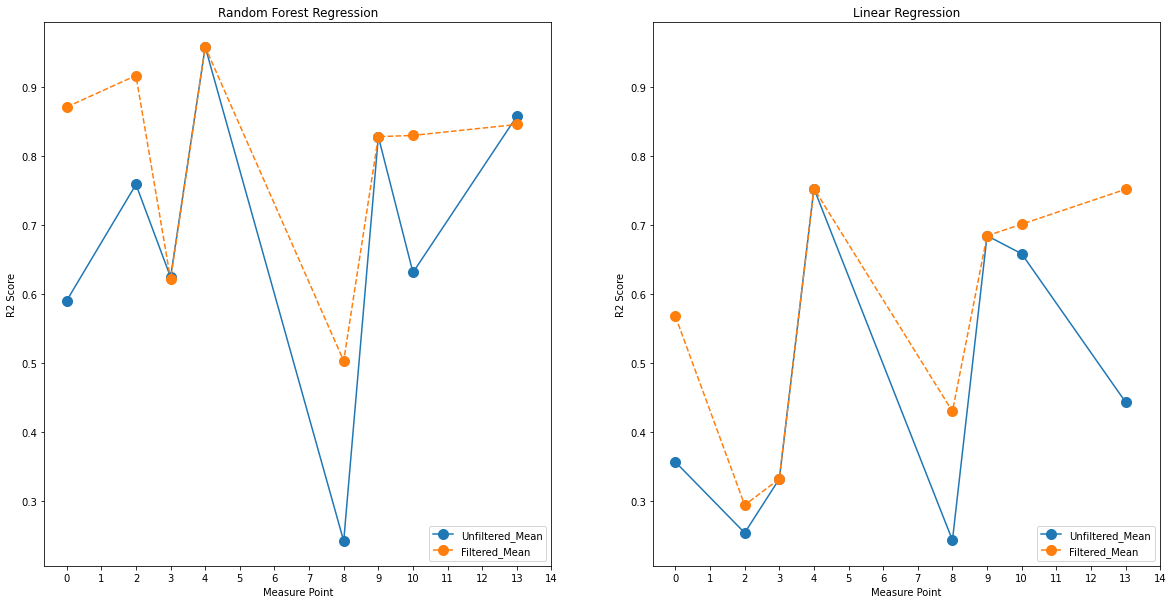

In [59]:
#Measurements with less than 3000 zeros
compareplot([0,2,3,4,8,9,10,13],RF_del,RFf_del,LR_del,LRf_del,"Random Forest Regression","Linear Regression","Unfiltered_Mean","Filtered_Mean")

From the graph above we can see that the filter data consistently provides better r2 score than unfiltered mean data regardless the type of model with an exception for measurement 14 in random forest. However, the difference between filtered and unfiltered is small. It is obvious that random forest provides better prediction compared to linear regression. More tuning needed for point 3 and 8 as the R2 score was below 0.7.

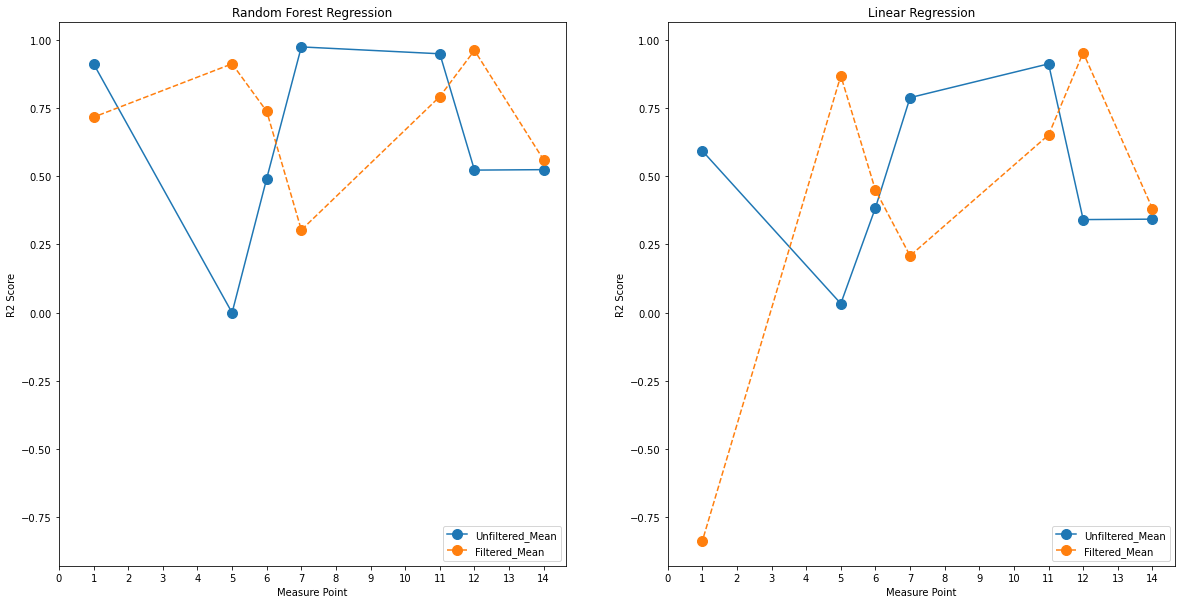

In [60]:
# Measurements with more than 3000 zeros
compareplot([14,12,11,7,6,5,1],x,x1,y,y1,"Random Forest Regression","Linear Regression","Unfiltered_Mean","Filtered_Mean")

For the measurements with a high amount of zero value, the benefit of using filtered data is not obvious. To obtain better prediction and confidence in the model, more usable data are required for these measurement points.

# Conclusion
At first, the data was examined to eliminate the negative values and to replace zeros with mean and median value of respective measurement point. The dataset was then used to predict the measurement using linear regression and random forest regression. Overall, random forest had better r2 score using mean dataset but we chose to futhur proceed with median dataset to take the distribution range of the dataset into consideration.

After that, the median dataset was filtered to 20% around measurements' setpoint value to reduce the number of outliers. 6 out of 15 measurements can be predicted with confidence using random forest regressor and filtered data. Measurement point 3 and 8 required more tuning as their r2 score were below 0.7. The minimum r2 score was 0.5 for measurement 8. 

As for the rest of the measurements with high zero value, even though some of them had high r2 value but it could be due to the high replacement of mean value.

Future Direction:
-   Improve the R2 score for point 3 and 8.
-	Find the execute time for random forest and linear regressor
-   Find the important features to reduce the running time

